https://fall-2023-python-programming-for-data-science.readthedocs.io/en/latest/Lectures/Theme_3-Model_Engineering/Lecture_14-Ensemble_Methods/Lecture_14-Ensemble_Methods.html#14.4-Boosting-Ensemble

19412/19412 [==============================] - 101s 5ms/step
Training time: 4.09 seconds
4853/4853 [==============================] - 25s 5ms/step
Test time: 0.03 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     77676
           1       0.91      0.89      0.90     77614

    accuracy                           0.90    155290
   macro avg       0.90      0.90      0.90    155290
weighted avg       0.90      0.90      0.90    155290



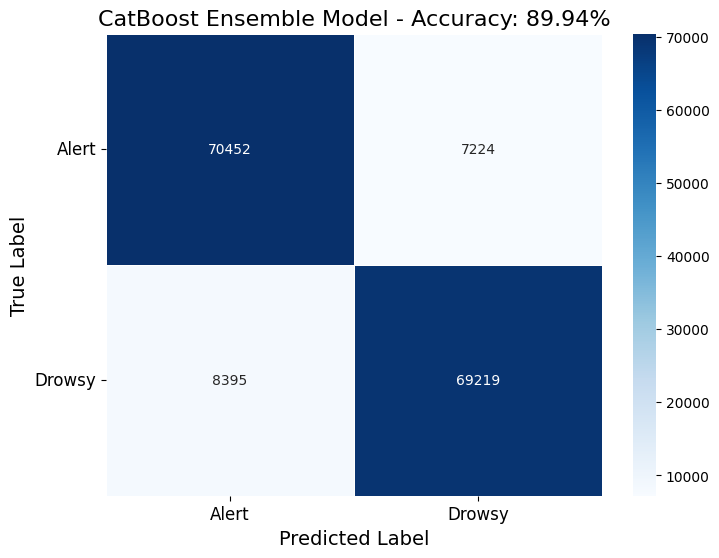

Accuracy: 0.8994204391783115
Precision: 0.9054982143557945
Recall: 0.8918365243383926
F1-score: 0.8986154475291613
AUC-ROC: 0.8994174124858964


In [2]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from catboost import CatBoostClassifier
from tensorflow.keras.models import load_model
from time import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Load your data
X_train = np.load('../../Data/Train Test Dataset - Feature 5/X_train.npy')
X_test = np.load('../../Data/Train Test Dataset - Feature 5/X_test.npy')
y_train = np.load('../../Data/Train Test Dataset - Feature 5/y_train.npy')
y_test = np.load('../../Data/Train Test Dataset - Feature 5/y_test.npy')

# Load your pre-trained models
ann_model = load_model('../../H5 Files/Feature 5/ANN_Architecture_5_Features.h5')
lstm_model = load_model('../../H5 Files/Feature 5/LSTM_Architecture_5_Features.h5')
gru_model = load_model('../../H5 Files/Feature 5/GRU_Architecture_5_Features.h5')

# Get predictions from base models on training data
ann_pred = ann_model.predict(X_train)
lstm_pred = lstm_model.predict(X_train)
gru_pred = gru_model.predict(X_train)

# Stack predictions horizontally for training data (used as features in boosting)
X_train_stacked = np.hstack((ann_pred, lstm_pred, gru_pred))

# Train the CatBoost model
boosting_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, random_seed=42, verbose=0)

# Train the boosting model
start_time = time()
boosting_model.fit(X_train_stacked, y_train)
end_time = time()

training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

# Get predictions on test data
ann_pred_test = ann_model.predict(X_test)
lstm_pred_test = lstm_model.predict(X_test)
gru_pred_test = gru_model.predict(X_test)

# Stack predictions horizontally for test data
X_test_stacked = np.hstack((ann_pred_test, lstm_pred_test, gru_pred_test))

# Test the CatBoost model
start_time_test = time()
ensemble_pred_test = boosting_model.predict(X_test_stacked)
end_time_test = time()

test_time = end_time_test - start_time_test
print(f"Test time: {test_time:.2f} seconds")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, ensemble_pred_test))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, ensemble_pred_test)
accuracy = accuracy_score(y_test, ensemble_pred_test) * 100

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels=["Alert", "Drowsy"], yticklabels=["Alert", "Drowsy"], linewidths=.5)
plt.title(f'CatBoost Ensemble Model - Accuracy: {accuracy:.2f}%', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

# Performance Metrics
accuracy = accuracy_score(y_test, ensemble_pred_test)
precision = precision_score(y_test, ensemble_pred_test)
recall = recall_score(y_test, ensemble_pred_test)
f1 = f1_score(y_test, ensemble_pred_test)
auc_roc = roc_auc_score(y_test, ensemble_pred_test)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", auc_roc)
